In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

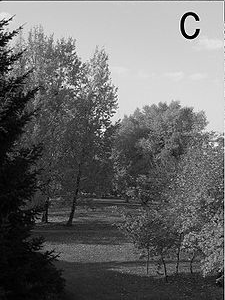

In [ ]:
img=cv2.imread("/content/Gray level slicing.bmp",0)
cv2_imshow(img)

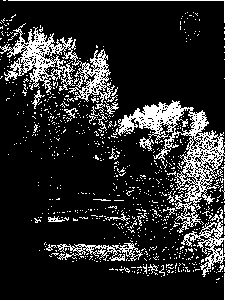

In [ ]:
t1=100
t2=180
m,n=img.shape
output=np.zeros((m,n),dtype=np.uint8)
for x in range (m):
  for y in range (n):
    if t1<img[x,y]<t2:
      output[x,y]=255;
    else:
      output[x,y]=0;

cv2_imshow(output)

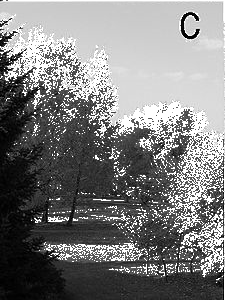

In [ ]:
t1=100
t2=180
m,n=img.shape
output=np.zeros((m,n),dtype=np.uint8)
for x in range (m):
  for y in range (n):
    if t1<img[x,y]<t2:
      output[x,y]=255;
    else:
      output[x,y]=img[x,y];

cv2_imshow(output)

In [ ]:
img=cv2.imread("/content/Bit plane slicing.bmp",0)
m,n=img.shape
list=[]
for i in range(m):
  for j in range(n):
    list.append(np.binary_repr(img[i][j],width=8))

In [ ]:
plane7=(np.array([int(i[0]) for i in list],dtype=np.uint8)*128).reshape(m,n)
plane6=(np.array([int(i[1]) for i in list],dtype=np.uint8)*64).reshape(m,n)
plane5=(np.array([int(i[2]) for i in list],dtype=np.uint8)*32).reshape(m,n)
plane4=(np.array([int(i[3]) for i in list],dtype=np.uint8)*16).reshape(m,n)
plane3=(np.array([int(i[4]) for i in list],dtype=np.uint8)*8).reshape(m,n)
plane2=(np.array([int(i[5]) for i in list],dtype=np.uint8)*4).reshape(m,n)
plane1=(np.array([int(i[6]) for i in list],dtype=np.uint8)*2).reshape(m,n)
plane0=(np.array([int(i[7]) for i in list],dtype=np.uint8)*1).reshape(m,n)


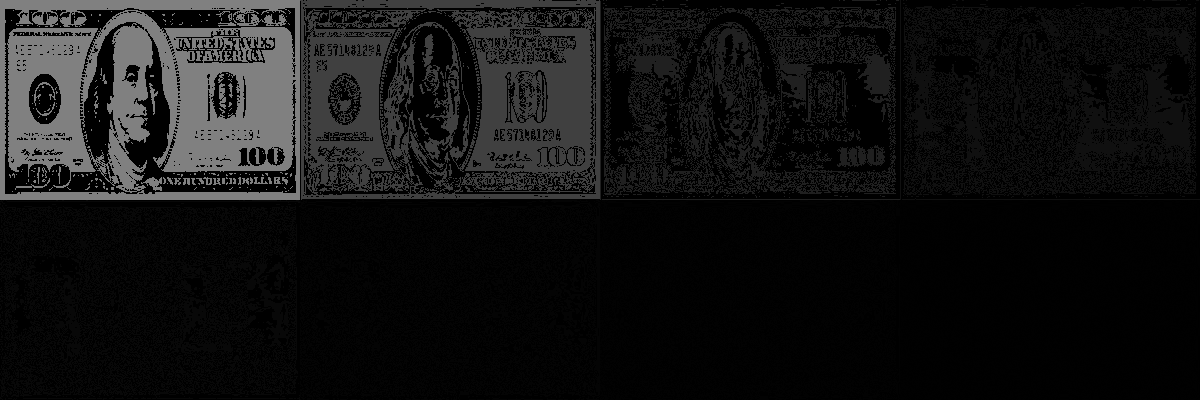

In [ ]:
finalr=cv2.hconcat([plane7,plane6,plane5,plane4])
finalv=cv2.hconcat([plane3,plane2,plane1,plane0])
final=cv2.vconcat([finalr,finalv])
cv2_imshow(final)

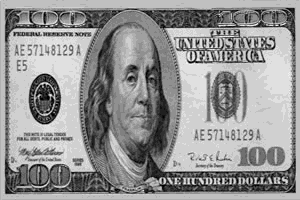

In [ ]:
new_img=plane7+plane6+plane5+plane4
cv2_imshow(new_img)

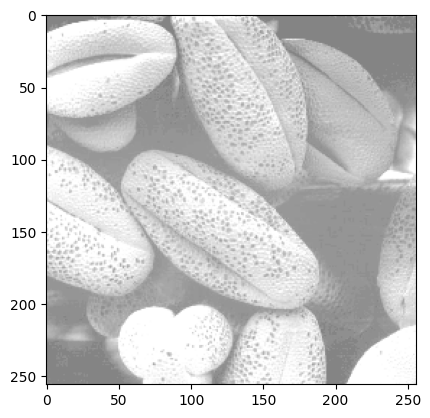

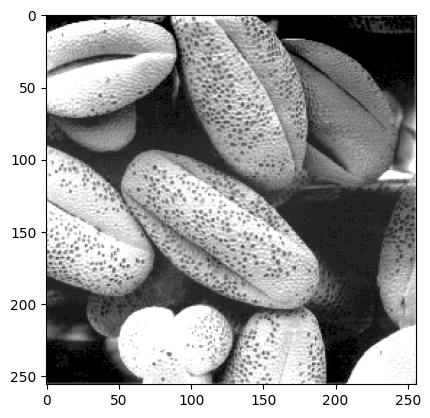

In [ ]:
#contrast stretching
img=cv2.imread('/content/hist2.bmp')
w,h,d=img.shape
img2=img.copy()
r1=120
s1=255
r2=150
s2=90

m1=s1/r1
m2=(s2-s1)/(r2-r1)
m3=(255-s2)/(255-r2)

for i in range(w-1):
  for j in range(h-1):
    for k in range(d-1):
      if((img[i][j][k])<r1):
        img2[i][j][k]=m1*img[i][j][k];
      elif (img[i][j][k]==r1 and img[i][j][k]<=r2):
        img2[i][j][k]=(img[i][j][k]-r1)*m2+s1;
      else:
        img2[i][j][k]=(img[i][j][k]-r2)*m3+s2;

plt.imshow(img)
plt.show()
gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")
plt.show()

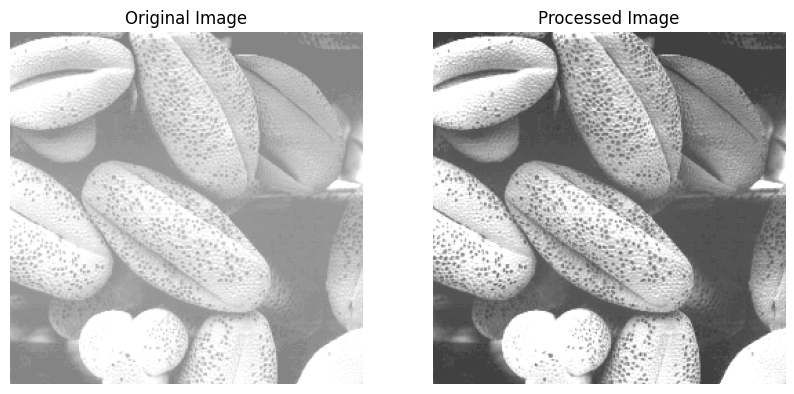

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/hist2.bmp')
w, h, d = img.shape
img2 = img.copy()

r1 = 120
s1 = 50
r2 = 180
s2 = 120

m1 = s1 / r1
m2 = (s2 - s1) / (r2 - r1)
m3 = (255 - s2) / (255 - r2)

for i in range(w):
    for j in range(h):
        for k in range(d):
            if img[i][j][k] < r1:
                img2[i][j][k] = m1 * img[i][j][k]
            elif r1 <= img[i][j][k] < r2:
                img2[i][j][k] = (img[i][j][k] - r1) * m2 + s1
            else:
                img2[i][j][k] = (img[i][j][k] - r2) * m3 + s2

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.title('Original Image')
plt.axis('off')

# Display processed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

  # Convert to RGB for correct display
plt.title('Processed Image')
plt.axis('off')

plt.show()